In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
len(y_train)

60000

In [6]:
len(y_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]  #2D

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

The number in output is 5


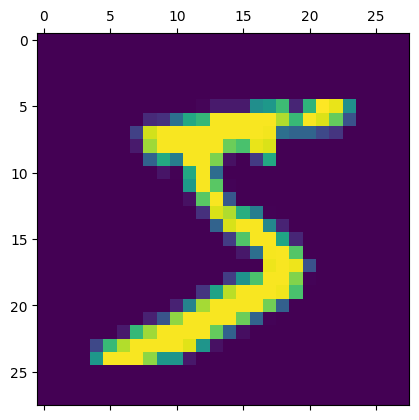

In [10]:
plt.matshow(X_train[0])
print("The number in output is", y_train[0])

The number in output is 0


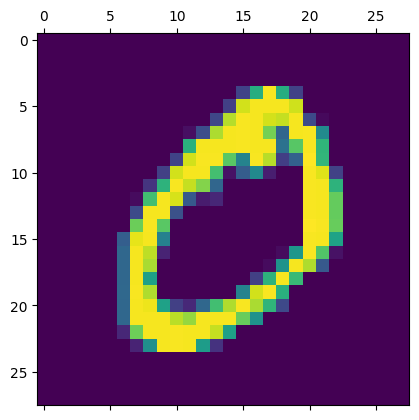

In [11]:
plt.matshow(X_train[1])
print("The number in output is", y_train[1])

In [12]:
X_train = X_train/255
X_test = X_test/255

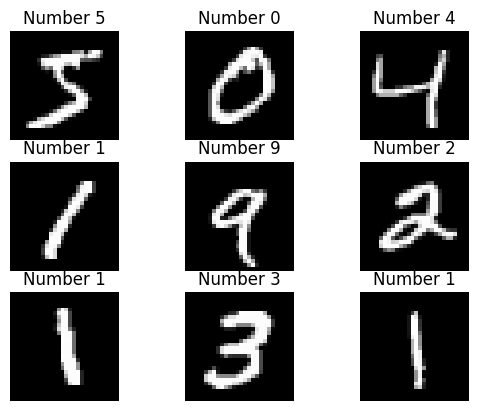

In [13]:
for i in range(9):
  ax = plt.subplot(3,3,i+1) #rows, columns and label
  plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
  plt.title("Number {}".format(y_train[i]))
  plt.axis('off')

###### Flattening datasets (From 2D to 1D)

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
# flattening the training dataset (28*28 image into single dimensional array)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
print (X_train_flattened.shape)

(60000, 784)


In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
# flattening the testing dataset (28*28 image into single dimensional array)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print(X_test_flattened.shape)

(10000, 784)


In [18]:
X_train_flattened[0]   #1D

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

###### Creating neural network- 2 layers (input- 784 elements and output- 10 elements)

In [19]:
# dense means all neurons in first layer are connected to neurons in second layer f
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')  # 10 is output
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# training set is supplied here
model.fit(X_train_flattened, y_train, epochs=10)

2025-01-16 19:34:07.621583: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-16 19:34:07.991902: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 2s 650us/step - loss: 0.4737 - accuracy: 0.8760
Epoch 2/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.2733 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.2663 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.2620 - accuracy: 0.9276
Epoch 7/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.2583 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 1s 656us/step - loss: 0.2556 - accuracy: 0.9296
Epoch 9/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.2528 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 1s 678u

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 562us/step - loss: 0.2665 - accuracy: 0.9260


[0.26649346947669983, 0.9259999990463257]

###### Trying prediction

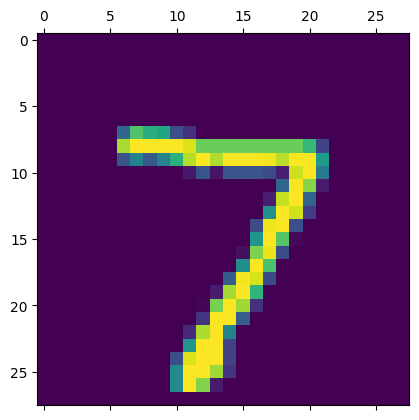

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test_flattened)
print (y_predicted[0])

[1.8337369e-03 1.0431010e-08 1.3817221e-02 9.7334933e-01 1.7599165e-03
 1.1693302e-01 3.1733592e-08 9.9983239e-01 6.5443844e-02 6.5980124e-01]


In [23]:
np.argmax(y_predicted[0])

7

In [24]:
# converting y_predicted decimal values to descrete values
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    1,    6,    7,    4,    2,    0],
       [   0, 1110,    4,    2,    0,    1,    3,    2,   13,    0],
       [   4,    9,  914,   23,    8,    3,   10,   11,   46,    4],
       [   1,    0,   15,  935,    2,   16,    1,    9,   24,    7],
       [   1,    1,    5,    3,  926,    0,    5,    4,    9,   28],
       [   8,    2,    3,   54,   13,  756,   10,    9,   32,    5],
       [   9,    3,   10,    1,    8,   15,  906,    2,    4,    0],
       [   1,    6,   21,    6,   10,    1,    0,  948,    2,   33],
       [   3,    6,    5,   23,    9,   18,    5,   11,  886,    8],
       [   7,    7,    1,   10,   27,    5,    0,   20,    9,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

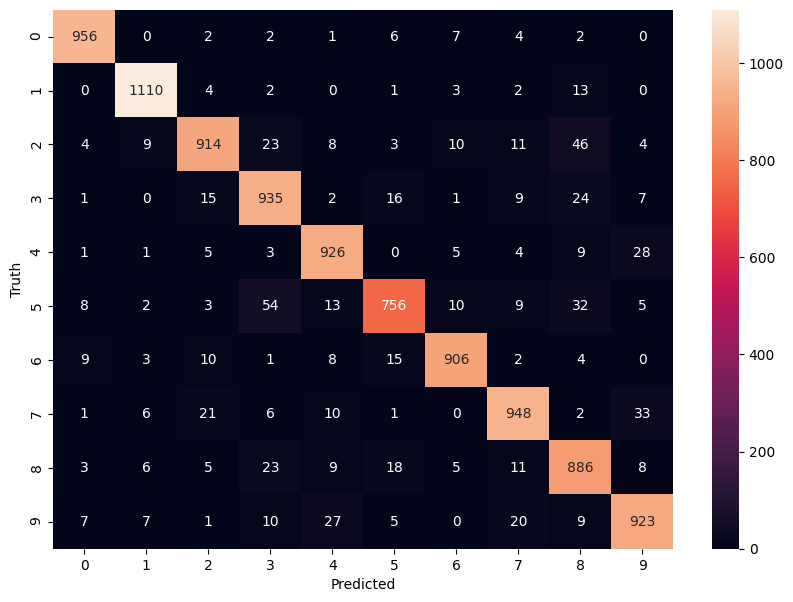

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

###### Adding hidden layer to the neural network

In [28]:
# dense means all neurons in first layer are connected to neurons in second layer 
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # 100 is number of neurons in hidden layer
    keras.layers.Dense(10,activation='sigmoid')  # 10 is output
])

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# training set is supplied here
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.2796 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.1267 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.0875 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.0663 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0530 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 2s 920us/step - loss: 0.0338 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 2s 941us/step - loss: 0.0277 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 2s 902us/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 2s 899us/

In [29]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 613us/step - loss: 0.0886 - accuracy: 0.9755


[0.08860354125499725, 0.9754999876022339]

Text(95.72222222222221, 0.5, 'Truth')

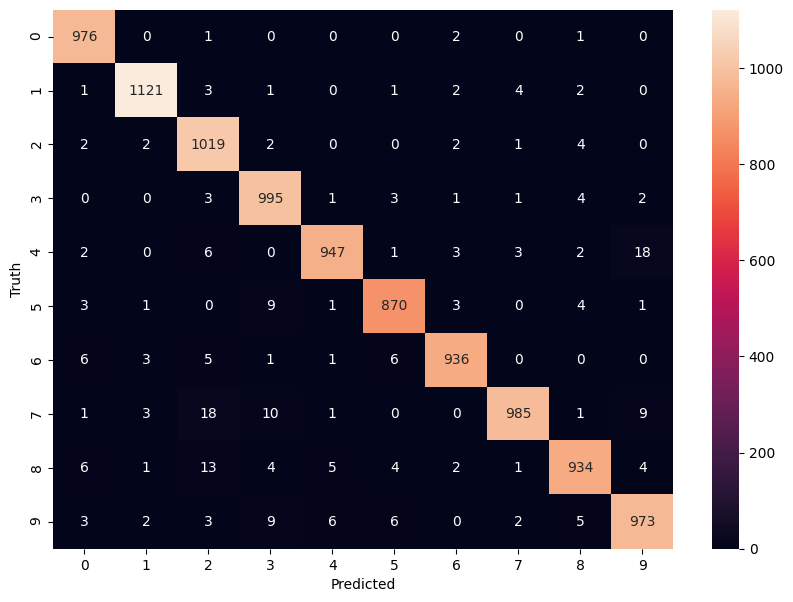

In [30]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')